## Testando Dataset

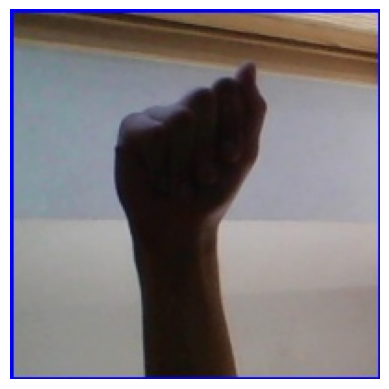

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import cv2

image_path = 'C:/Users/juanp/Desktop/DataSet/asl_alphabet_train/asl_alphabet_train/A/A1.jpg'
image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()



Dados basicos de uma imagem

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import cv2

image_path = 'C:/Users/juanp/Desktop/DataSet/asl_alphabet_train/asl_alphabet_train/A/A1.jpg'
image = cv2.imread(image_path)

if image is not None:
    height, width, channels = image.shape

    for i in range(3):
        pixel = image[i,i]
        print(f'Pixel{i+1}: Valor BGR: {pixel}')
        properties = [
            ('Altura', image.shape[0]),
            ('Largura', image.shape[1]),
            ('Canais de cor', image.shape[2]),
            ('Tipo de dado', image.dtype),
            ('Valor Maximo', image.max()),
            ('Valor Minimo', image.min()),
            ('Media', image.mean()),
            ('Desvio Padrão', image.std())
        ]
        for prop_name, prop_value in properties:
            print(f'{prop_name}:{prop_value}')
        cv2.imshow('Imagem - OpenCV', image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
else:
    print('Erro ao carregar imagem')




Pixel1: Valor BGR: [252   2   1]
Altura:200
Largura:200
Canais de cor:3
Tipo de dado:uint8
Valor Maximo:255
Valor Minimo:0
Media:115.14009166666666
Desvio Padrão:58.922554249836544
Pixel2: Valor BGR: [234   1   3]
Altura:200
Largura:200
Canais de cor:3
Tipo de dado:uint8
Valor Maximo:255
Valor Minimo:0
Media:115.14009166666666
Desvio Padrão:58.922554249836544
Pixel3: Valor BGR: [144  32  39]
Altura:200
Largura:200
Canais de cor:3
Tipo de dado:uint8
Valor Maximo:255
Valor Minimo:0
Media:115.14009166666666
Desvio Padrão:58.922554249836544


Imagem em tons de cinza 

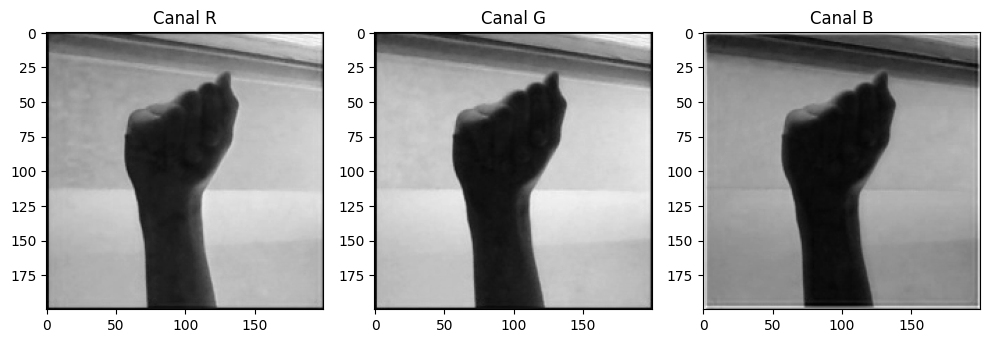

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import cv2

image_path = 'C:/Users/juanp/Desktop/DataSet/asl_alphabet_train/asl_alphabet_train/A/A1.jpg'
image = cv2.imread(image_path)

b,g,r = cv2.split(image)
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.imshow(r,cmap='gray')
plt.title('Canal R')

plt.subplot(132)
plt.imshow(g,cmap='gray')
plt.title('Canal G')

plt.subplot(133)
plt.imshow(b,cmap='gray')
plt.title('Canal B')

plt.tight_layout()
plt.show()

Segmentando a imagem

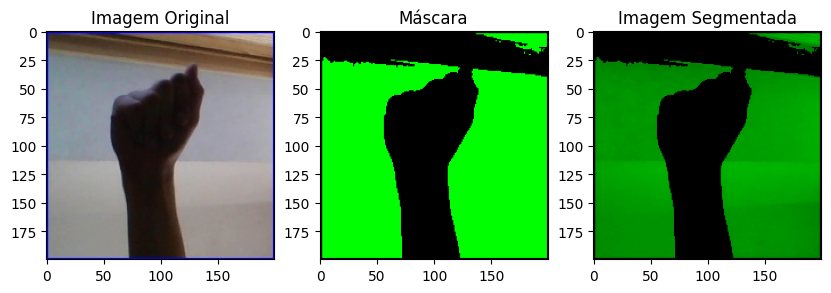

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import numpy as np

image_path = 'C:/Users/juanp/Desktop/DataSet/asl_alphabet_train/asl_alphabet_train/A/A1.jpg'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros_like(image)
cv2.drawContours(mask, contours, -1, (0, 255, 0), -1)
segmented_image = cv2.bitwise_and(image, mask)

plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(image[:, :, ::-1]), plt.title('Imagem Original')
plt.subplot(132), plt.imshow(mask[:, :, ::-1]), plt.title('Máscara')
plt.subplot(133), plt.imshow(segmented_image[:, :, ::-1]), plt.title('Imagem Segmentada')
plt.show()